### Importing libraries

Just like you need to get all the tools before you can start painting a picture (brushes, paper, paint, etc), we also need to get the all the tools for plotting and analysing data in Python. In Python these are called 'libraries' and each library has a set of premade functions and codes that will help us to analyse and plot the AQ data. In the list below we have imported many libraries that we will use (with a short description added to explain what they are used for). 

In [39]:
import math                           # allows the use of basic mathematical functions
import calendar                       # useful library if you want to do some basic calendar manipulations (selecting specific days for example)
import numpy as np                    # useful library to use for array manipulation
import matplotlib.pyplot as plt       # used to make plots in python
import matplotlib.dates as mdates     # used to work with dates in our figures
import pandas as pd                   # easy to use data manipulation library (also easiest way to read in standard data)
import seaborn as sns                 # use seaborn style defaults for plotting (i.e. formatting of the figures) 
import cartopy                        # cartopy is the library that enables us to plot world/regional maps
import cartopy.crs as ccrs            # selecting the Cartopy Coordinate Reference Systems (projection of the map)
import cartopy.feature as cfeature    # adding features to the map
import cartopy.io.img_tiles as cimgt  # plot high resolution on the local map
import io                                      # input output routine library
from urllib.request import urlopen, Request    # importing maps using an url
from PIL import Image                          # library needed to create map image

%matplotlib inline

### Reading in the Flow 2 data
Before we can start analysing the Flow 2 data we need to import it to the python environment. We use the first two example files given in the folder *Part1A_Flow2_data* : 1) user_measures_20200929_20201109_2.csv and 2) user_positions_20200929_20201109_2.csv.

When you will start collecting your own data the Flow 2 files will be of a similar structure, but much larger. Make sure to change the paths to the files and names of the files below to be able to look at the data.

In [40]:
df = pd.read_csv('user_measures_20200929_20201109_2.csv')    # using pandas to read in the measurement csv datafile (we call it df)
df2 = pd.read_csv('user_positions_20200929_20201109_2.csv')  # using pandas to read in the position csv datafile (we call it df2)

Measurement_data=np.array(df)                                # make a numpy array (easier to work with the data)
Position_data=np.array(df2)  

We have now downloaded the timeseries for both the measurements and the position of the Flow 2 instrument. Before we go ahead and plot data, let's first have a look at the structure of the array that we now have created: 

In [41]:
print (np.shape(Measurement_data))      # np.shape is a function from the numpy library that calculates the dimension of the array

(1273, 12)


Looking at the values above we see that the array has two dimensions (1273 and 12). To help you interpret these numbers, imagine that the array is a large chest of drawers, where the first number (1273) represents the number of drawers (dimension) from top to botom (rows) and the second number (13) is the number the drawers from left to right (columns). Each combination of these 2 numbers within this range represent a specific drawer where we have stored a specific value. For example [2,10] is the drawer 11 in row 3 (in python we start counting from 0) and these numbers will help us to identify the location where we have stored our data.

In our Flow 2 example, we have 1273 rows, each row represents a specific time (i.e. 24*60=1440 minutes per day, so almost a full day of data). In other words, each row of drawers represents the minute data and each variable is stored in a specific column of our chest of drawers. Let us have a look at the headers of each column, so that we know what data is stored:

In [42]:
print (df.keys())              # this statement prints all the headers of the columns 

Index(['timestamp', 'date (UTC)', 'NO2 (ppb)', 'VOC (ppb)', 'pm 10 (ug/m3)',
       'pm 2.5 (ug/m3)', 'NO2 (Plume AQI)', 'VOC (Plume AQI)',
       'pm 10 (Plume AQI)', 'pm 2.5 (Plume AQI)', 'pm 1 (ug/m3)',
       'pm 1 (Plume AQI)'],
      dtype='object')


This shows that there is a lot of different species stored in this array. If for example we want to know what is stored in the 3rd column (i.e. we start counting from 0, so this is element 2) we can type:

In [43]:
print (df.keys()[2]) 

NO2 (ppb)


We will now use the relevant columns in the 'df' array (e.g. 'NO2 (ppb)' and 'date (UTC)') to actually plot the timeseries of NO$_2$

## Plotting a timeseries of the AQ data

Now that we know what data we have in our array, we can start plotting the data. Using the pandas dataframe (df), it is relatively easy to get a quick look at the data using the build in 'plot' function and the name of a specific column (use the full name as shown in the print statement above):  

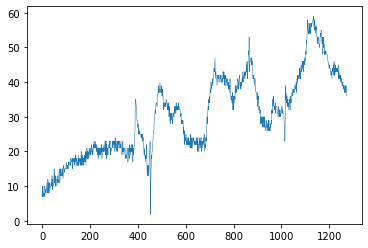

In [44]:
df['NO2 (ppb)'].plot(linewidth=0.5)           # We plot all the values in the column 'NO2 (ppb)' from the df array

However this plot does not have any information on what is plotted on the axis, does not look that nice and so we need to work on the plot to make it more presentable. For example we need to add a label to the y-axis and convert the x-axis to represent the time, rather than the index of the row (1273 timesteps). To do this, we create a plot using the 'matplotlib' library, as this gives us more freedom. THe first thing we need to do is to make the x-axis a date rather than the input row number. This is done by changing the index of our df array based on the date column:

In [45]:
df.index = pd.to_datetime(df['date (UTC)'])

Now we can plot the data in all kind of different ways and I suggest that you play around with the options to make them the way you like them. For the example below, I plot the NO$_2$ concentrations during the first 12 hours of 30 September. 

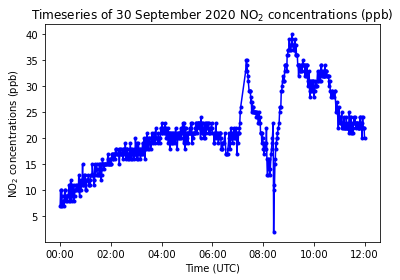

In [46]:
fig, ax = plt.subplots()                     # defining the name of our plot (fig)
# defining what time interval we want to plot (based on day and time), marker type, marker size, color and line style
ax.plot(df.loc['30-09-2020 00:00':'30-09-2020 12:00', 'NO2 (ppb)'], marker='o', markersize=3, color='b', linestyle='-')     #df.loc can be used to select specific dates in your dataframe
# set labels and title of plot
ax.set_ylabel('NO$_2$ concentrations (ppb)')
ax.set_xlabel('Time (UTC)')
ax.set_title('Timeseries of 30 September 2020 NO$_2$ concentrations (ppb)')
# Format x-tick labels as hour and minutes of the day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));

## Plotting multiple datasets

Yay, we have succesfully plotted a timeseries of the data with correct axes and a title! Now let's try to add an additional dataset to this figure, so that we can compare the NO$_2$ concentrations to VOC concentrations. 

Now we add one line to the plot we made above to have the second dataset in the figure:

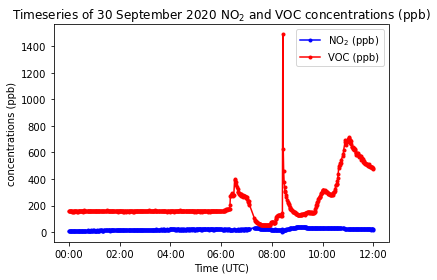

In [47]:
fig, ax = plt.subplots()                     # defining the name of our plot (fig)
# defining what time interval we want to plot (based on day and time), marker type, marker size, color and line style
ax.plot(df.loc['30-09-2020 00:00':'30-09-2020 12:00', 'NO2 (ppb)'], marker='o', markersize=3, color='b', linestyle='-', label='NO$_2$ (ppb)')     #df.loc can be used to select specific dates in your dataframe
ax.plot(df.loc['30-09-2020 00:00':'30-09-2020 12:00', 'VOC (ppb)'], marker='o', markersize=3, color='r', linestyle='-', label='VOC (ppb)')     #df.loc can be used to select specific dates in your dataframe
# set labels and title of plot
ax.set_ylabel('concentrations (ppb)')
ax.set_xlabel('Time (UTC)')
ax.set_title('Timeseries of 30 September 2020 NO$_2$ and VOC concentrations (ppb)')
ax.legend()   # adding the legend to the plot to distinquish the two datasets on the figure
# Format x-tick labels as hour and minutes of the day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));

We see that the two datasets show very different range during the first 12 hours, which can make it difficult to interpret the data. Instead, we could also plot the two datasets underneath to each other in different pannels. This is done using the following command:

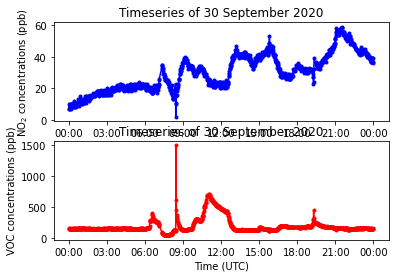

In [48]:
fig, ax = plt.subplots(2,1)                     # defining the name of our plot (fig) and the numerb of subplots (in this case 2 plots in the vertical and 1 horizontal
# defining what time interval we want to plot, marker type, marker size, color and line style
ax[0].plot(df.loc['30-09-2020 00:00':'30-09-2020 23:59', 'NO2 (ppb)'], marker='o', markersize=3, color='b', linestyle='-', label='NO2 (ppb)')     #df.loc can be used to select specific dates in your dataframe
ax[1].plot(df.loc['30-09-2020 00:00':'30-09-2020 23:59', 'VOC (ppb)'], marker='o', markersize=3, color='r', linestyle='-', label='VOC (ppb)')     #df.loc can be used to select specific dates in your dataframe
# set labels and title of plot
ax[0].set_ylabel('NO$_2$ concentrations (ppb)')       #Top plot 
ax[0].set_title('Timeseries of 30 September 2020')
ax[0].set_xlabel('Time (UTC)')
ax[1].set_ylabel('VOC concentrations (ppb)')       #Bottom plot
ax[1].set_xlabel('Time (UTC)')
ax[1].set_title('Timeseries of 30 September 2020')
# Format x-tick labels as 3-letter month name and day number
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));

Plotting the two figures independently as we have done above, we see that there are several issues:
- First of all the x-axis don't line up (fixed using sharex='all')
- The title of the second plot is accros the x-axis labels of the top plot (replace by one title plot at the top).
- The x-axis labels are too close to each other (we rotate the labels 45 degrees)
- The y-axis labels are interfering with eachother (place the y-axis manually using the function yaxis.set_label_coords).
- The y-axis has a different range and different tick frequencies (add the set_ylim and yaxis.set_ticks parameters)
- We don't know which line represents which variable (adding legend to each plot).

We can fix these by adding the following lines to the figure:

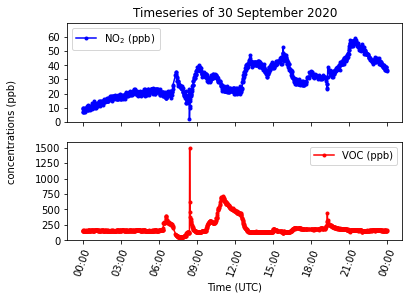

In [49]:
fig, ax = plt.subplots(2,1, sharex='all')                     # defining the name of our plot (fig) and the numerb of subplots (in this case 2 plots in the vertical and 1 horizontal
# defining what time interval we want to plot, marker type, marker size, color and line style
ax[0].plot(df.loc['30-09-2020 00:00':'30-09-2020 23:59', 'NO2 (ppb)'], marker='o', markersize=3, color='b', linestyle='-', label='NO$_2$ (ppb)')     #df.loc can be used to select specific dates in your dataframe
ax[1].plot(df.loc['30-09-2020 00:00':'30-09-2020 23:59', 'VOC (ppb)'], marker='o', markersize=3, color='r', linestyle='-', label='VOC (ppb)')     #df.loc can be used to select specific dates in your dataframe
# set the y-as limits and number of ticks for both plots:
ax[0].set_ylim([0,70])
ax[1].set_ylim([0,1600])
ax[0].yaxis.set_ticks(np.arange(0, 70, 10))
ax[1].yaxis.set_ticks(np.arange(0, 1600, 250))
# set labels and title of plot and add a legend to both plots:
ax[0].set_ylabel('concentrations (ppb)')       
ax[0].yaxis.set_label_coords(-0.15, -0.1) 
ax[0].set_title('Timeseries of 30 September 2020')
ax[0].legend()   # this will use the label we defined in the .plot functions above
ax[1].legend()
ax[1].set_xlabel('Time (UTC)')
# Format x-tick labels as 3-letter month name and day number
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));
# rotating the x-axis labels by 70 degrees
ax[1].tick_params(axis='x', rotation=70)

## Plotting a map

Another application of the data is to actually plot the location of the Flow2 measurements on top of a map. To do this we will need to use the location data that we stored in the df2 dataframe (see start of the document). Let us start by looking at what is stored in this dataframe:

In [50]:
print (df2.keys())

Index(['timestamp', 'date', 'latitude', 'longitude'], dtype='object')


Here we see that this array contains both the date and the corrensponding latitude and longitude. Let us see if we can actually plot this data on a map. First we have to retrieve the street map where we want to plot our data:

In [51]:
# Mapping Cambridge Street Map (OSM) with Cartopy
# This code uses a spoofing algorithm to avoid bounceback from OSM servers
#

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.OSM() # spoofed, downloaded street map

Now we can use this OSM map to actually plot our data on a street map:

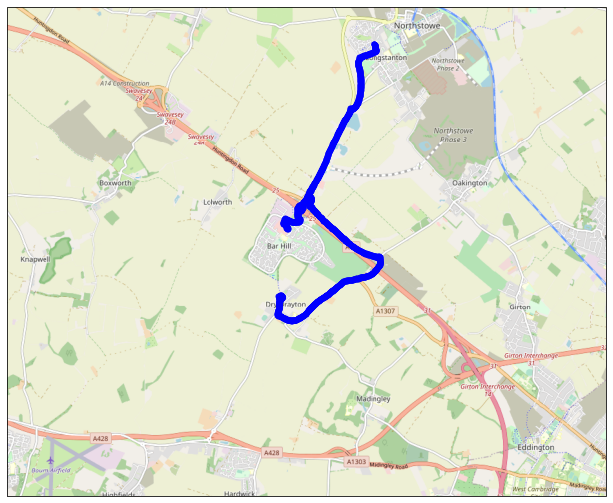

In [52]:
fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
center_pt = [df2['latitude'].mean(), df2['longitude'].mean()] # mean lat/lon values in the dataset df2. You can also change them to a specific value (e.g. first value in df2)
zoom = 0.04 # for zooming out of center point change this value if you want to extend or decrease the size of the map.
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
ax1.set_extent(extent) # set extents

scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification
# NOTE: zoom specifications should be selected based on extent:
# -- 2     = coarse image, select for worldwide or continental scales
# -- 4-6   = medium coarseness, select for countries and larger states
# -- 6-10  = medium fineness, select for smaller states, regions, and cities
# -- 10-12 = fine image, select for city boundaries and zip codes
# -- 14+   = extremely fine image, select for roads, blocks, buildings
ax1.plot(df2['longitude'], df2['latitude'], markersize=5,marker='o',linestyle='',color='b',transform=ccrs.PlateCarree())
plt.show() # show the plot

This now shows us the location of the Flow 2 instrument during our example measurement campaign. Maybe we want to zoom in on a particular part of our map to look into more detail. This can be done by changing the centre_pt and the zoom values in the code above. Play around with these values to see if you can plot the points on street levels in Bar Hill.

Investigating the timeseries of VOC, we see that there is a strong peak at some point between 8 am and 9 am. We might want to know where on the map these values are measured. To do this, we first try to identify the timing of the peak: 

In [53]:
maximum_value=df.loc['30-09-2020 00:00':'30-09-2020 12:00', 'VOC (ppb)'].max()  # locate the maximum value
df.index[df['VOC (ppb)']==maximum_value].tolist()   # determine the time for which we measured the maximum value

[Timestamp('2020-09-30 08:26:00')]

Now we try to understand where this measurement was taken by selecting this time in the location datafile:

In [54]:
df2.loc['30-09-2020 08:26':'30-09-2020 08:26', 'longitude']

Series([], Name: longitude, dtype: float64)

We see that the array is empty, showing us that we have no latitude/longitude data for this particular time. This shows you that doing this type of measurements can lead to uncomplete datasets and make it more complex to do our analysis. When you will do your own measurements, you will most likely have some gaps in your data that make analysing your data more challenging. What would be a possible solution for our current problem? We can select all the points between 8:10 and 8:50 to see if we have any lat/lon observations near this peak value:

In [55]:
df2.loc['30-09-2020 08:10':'30-09-2020 08:50', 'longitude']

Series([], Name: longitude, dtype: float64)

This shows that we have 3 data points in this time period. Plotting these datapoints in red shows us the locations of these points:

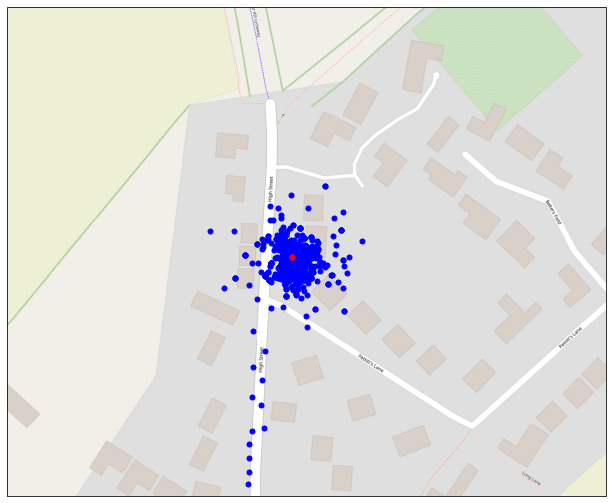

In [56]:
df2.index = pd.to_datetime(df2['date'])

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
center_pt = [df2['latitude'][0], df2['longitude'][0]] # mean lat/lon values in the dataset df2. You can also change them to a specific value (e.g. first value in df2)
zoom = 0.001 # for zooming out of center point change this value if you want to extend or decrease the size of the map.
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
ax1.set_extent(extent) # set extents

scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification
# NOTE: zoom specifications should be selected based on extent:
# -- 2     = coarse image, select for worldwide or continental scales
# -- 4-6   = medium coarseness, select for countries and larger states
# -- 6-10  = medium fineness, select for smaller states, regions, and cities
# -- 10-12 = fine image, select for city boundaries and zip codes
# -- 14+   = extremely fine image, select for roads, blocks, buildings
ax1.plot(df2.loc['30-09-2020 00:00':'30-09-2020 23:59', 'longitude'], df2.loc['30-09-2020 00:00':'30-09-2020 23:59', 'latitude'], markersize=5,marker='o',linestyle='',color='b',transform=ccrs.PlateCarree())
ax1.plot(df2.loc['30-09-2020 08:10':'30-09-2020 08:40', 'longitude'], df2.loc['30-09-2020 08:10':'30-09-2020 08:40', 'latitude'], markersize=5,marker='o',linestyle='',color='r',transform=ccrs.PlateCarree())
plt.show() # show the plot

And so we see that all three points have the same lat/lon location. This therefore makes it very likely that the peak value was measured at this location. 

## Saving the figure

Now that we have some experience making figures, we want to be able save them so that we can add them to our reports, presentations, blog etc...

Before we show you how to save a figure, we first have to discuss two different types of save files (vector and raster images). Depending on your needs, you will have to pick the one that is most suitable for you. Lets start by describing the two:

#### Raster images

Raster images, as the name suggests, defines a grid (raster) and uses many colored pixels to form a complete image. JPEGs, GIFs and PNGs are common raster image types. Almost all of the photos found on the web and in print catalogs are raster images.
Because raster images are constructed using a fixed number of colored pixels (Pixels per inch, also abbreviated as DPI), they can’t be dramatically resized without compromising their resolution. When stretched to fit a space they weren’t designed to fill, their pixels become visibly grainy and the image distorts. Therefore, it is important that you save raster files at precisely the dimensions needed to eliminate possible complications and also make sure you use a high enough DPI (e.g. 300 DPI is minimum requirement for most journals nowadays).

#### Vector images

Vector images are created using mathematical formulas rather than a grid. Common vector file types like EPS, AI and PDF are excellent for creating graphics that frequently require resizing. As a result of the vectorisation of your image, there is no decrease in sharpness when you resize your figures. The disatvantage of using vector images, is that the size of your figures can become huge, especially when you start to plot world maps etc. Therefore there is always a tradeoff between quality and figure size. Also when saving raster images with a very high dpi will get huge very fast, so don't overdo your dpi! 

Now that we know this difference, let's give an example of both (the error is related to the transparency of the seaborn style and doesn't affect our plots):

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


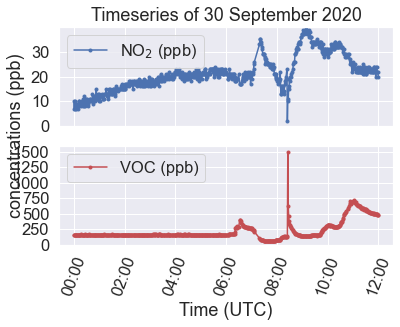

In [68]:
fig, ax = plt.subplots(2,1, sharex='all')                     # defining the name of our plot (fig) and the numerb of subplots (in this case 2 plots in the vertical and 1 horizontal
# defining what time interval we want to plot, marker type, marker size, color and line style
ax[0].plot(df.loc['30-09-2020 00:00':'30-09-2020 12:00', 'NO2 (ppb)'], marker='o', markersize=3, color='b', linestyle='-', label='NO$_2$ (ppb)')     #df.loc can be used to select specific dates in your dataframe
ax[1].plot(df.loc['30-09-2020 00:00':'30-09-2020 12:00', 'VOC (ppb)'], marker='o', markersize=3, color='r', linestyle='-', label='VOC (ppb)')     #df.loc can be used to select specific dates in your dataframe
# set the y-as limits and number of ticks for both plots:
ax[0].set_ylim([0,40])
ax[1].set_ylim([0,1600])
ax[0].yaxis.set_ticks(np.arange(0, 40, 10))
ax[1].yaxis.set_ticks(np.arange(0, 1600, 250))
# set labels and title of plot and add a legend to both plots:
ax[0].set_ylabel('concentrations (ppb)')       
ax[0].yaxis.set_label_coords(-0.15, -0.1) 
ax[0].set_title('Timeseries of 30 September 2020')
ax[0].legend()   # this will use the label we defined in the .plot functions above
ax[1].legend()
ax[1].set_xlabel('Time (UTC)')
# Format x-tick labels as 3-letter month name and day number
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));
# rotating the x-axis labels by 70 degrees
ax[1].tick_params(axis='x', rotation=70)
plt.savefig('Flow2.png', bbox_inches='tight', dpi=300)            # saving the figure as .png  
plt.savefig('Flow2_low.png', bbox_inches='tight', dpi=50)         # saving the figure as low quality .png  
plt.savefig('Flow2.eps', format='eps')                            # saving the figure as .eps

When you now check the folder you are currently working in, you will see the 3 saved files. As example I also created a low resolution Flow2_low.png file, to show you how important it is too have high quality figures! Try to make the Flow2_low.png file the size of your screen and see if you can still read the labels.

Note also that the some labels on the correct plots are still pretty small. Especially when you want to present these results to anyone in a presentation or poster, it is very important that you can actually read all the labels and titles. Therefore I suggest that you always make 2 versions of each plot. One where you use the standard fontsizes for your report and another one where you increase the fontsize to at least 18 for your poster/presentation. You can specify it for each label seperately, or in the case where you use seaborne, you can scale all axes by a factor 1.5 (as is done in the example below):

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


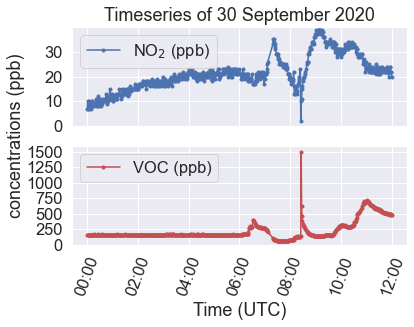

In [70]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(2,1, sharex='all')                     # defining the name of our plot (fig) and the numerb of subplots (in this case 2 plots in the vertical and 1 horizontal
# defining what time interval we want to plot, marker type, marker size, color and line style
ax[0].plot(df.loc['30-09-2020 00:00':'30-09-2020 12:00', 'NO2 (ppb)'], marker='o', markersize=3, color='b', linestyle='-', label='NO$_2$ (ppb)')     #df.loc can be used to select specific dates in your dataframe
ax[1].plot(df.loc['30-09-2020 00:00':'30-09-2020 12:00', 'VOC (ppb)'], marker='o', markersize=3, color='r', linestyle='-', label='VOC (ppb)')     #df.loc can be used to select specific dates in your dataframe
# set the y-as limits and number of ticks for both plots:
ax[0].set_ylim([0,40])
ax[1].set_ylim([0,1600])
ax[0].yaxis.set_ticks(np.arange(0, 40, 10))
ax[1].yaxis.set_ticks(np.arange(0, 1600, 250))
# set labels and title of plot and add a legend to both plots:
ax[0].set_ylabel('concentrations (ppb)')       
ax[0].yaxis.set_label_coords(-0.14, -0.1) 
ax[0].set_title('Timeseries of 30 September 2020')
ax[0].legend()   # this will use the label we defined in the .plot functions above
ax[1].legend()
ax[1].set_xlabel('Time (UTC)')
# Format x-tick labels as 3-letter month name and day number
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));
# rotating the x-axis labels by 70 degrees
ax[1].tick_params(axis='x', rotation=70)
plt.savefig('Flow2_poster.png', bbox_inches='tight', dpi=300)            # saving the figure as png   
plt.savefig('Flow2_poster.eps', format='eps')                            # saving the figure as eps

## Point of caution !
Now re-run the first block of code in this section. As you will notice, it also changed the fontsize of this figure to the larger size. This is because the program remembers what you evaluated in the code block above (i.e. fontsize times 1.5 is still saved as the current setting in the Kernel). As a result, if you rerun a previous block of code, you will get a different outcome as before. This is just a simple example why it is important to keep an eye on what you define throughout your code. Maybe you have assigned a value to a variable a=1 at the top of the document and then reassign a different value halfway through (i.e. a=10). If you go back to the start again, the program will use the last assigned value (a=10) and so your results will be completely different! If in doubt (e.g. you defined something and deleted the statement from the program, but it is still in the iPhyton memory), restart the Kernel and run through the entire code from the start. 

## Example 2: Plotting the timeseries of Second Flow 2 measurement (as shown in lecture notes)

Just like we have done for the previous examples, we now read in a new set of Flow 2 measurements (we will call it 'df_lecture'):

In [207]:
df_lecture = pd.read_csv('user_measures_20201130_20201204_2.csv')    # using pandas to read in the measurement csv datafile (we call it df)

Lecture_data=np.array(df_lecture)                                    # make a numpy array (easier to work with the data) 
print (np.shape(Lecture_data))                                   # investigating the dimensions of our array

(4627, 12)


Looking at the values above we see that the array has two dimensions (4627 and 12). In this Flow 2 example, we have 4627 rows, each row represents a specific time (i.e. 24*60=1440 minutes per day, so a bit more than 3 days of data). Let us have a look at the headers of each column, so that we know what data is stored:

In [208]:
print (df_lecture.keys())              # this statement prints all the headers of the columns 

Index(['timestamp', 'date (UTC)', 'NO2 (ppb)', 'VOC (ppb)', 'pm 10 (ug/m3)',
       'pm 2.5 (ug/m3)', 'NO2 (Plume AQI)', 'VOC (Plume AQI)',
       'pm 10 (Plume AQI)', 'pm 2.5 (Plume AQI)', 'pm 1 (ug/m3)',
       'pm 1 (Plume AQI)'],
      dtype='object')


This shows that there it are the same species stored in this array as in our first example. This should make it easier for us to plot these values, as we already have the code. Let's plot the timeseries for the second of December 2020:

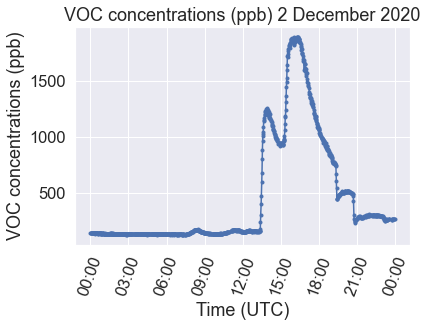

In [281]:
df_lecture.index = pd.to_datetime(df_lecture['date (UTC)'])       # set the time index to help us select the times we want to plot

fig, ax = plt.subplots()                     # defining the name of our plot (fig)
# defining what time interval we want to plot (based on day and time), marker type, marker size, color and line style
ax.plot(df_lecture.loc['2020-12-02 00:00':'2020-12-03 00:00', 'VOC (ppb)'], marker='o', markersize=3, color='b', linestyle='-')     #df.loc can be used to select specific dates in your dataframe
# set labels and title of plot
ax.set_ylabel('VOC concentrations (ppb)')
ax.set_xlabel('Time (UTC)')
ax.set_title('VOC concentrations (ppb) 2 December 2020')
ax.tick_params(axis='x', rotation=70)
# Format x-tick labels as hour and minutes of the day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')); 
plt.savefig('Flow2_2Dec_VOC.png', bbox_inches='tight', dpi=300)            # saving the figure as png 

Or we can also plot PM10 mass concentrations:

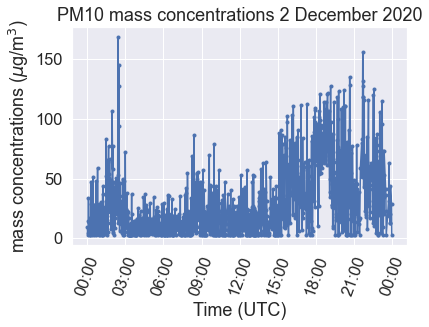

In [210]:
fig, ax = plt.subplots()                     # defining the name of our plot (fig)
# defining what time interval we want to plot (based on day and time), marker type, marker size, color and line style
ax.plot(df_lecture.loc['2020-12-02 00:00':'2020-12-03 00:00', 'pm 10 (ug/m3)'], marker='o', markersize=3, color='b', linestyle='-')     #df.loc can be used to select specific dates in your dataframe
# set labels and title of plot
ax.set_ylabel('mass concentrations ($\mu$g/m$^3$)')
ax.set_xlabel('Time (UTC)')
ax.set_title('PM10 mass concentrations 2 December 2020')
ax.tick_params(axis='x', rotation=70)
# Format x-tick labels as hour and minutes of the day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')); 

Looking at the PM10 figure above, we see that the signal is more variable than the VOC mixing ratios. So let us have a look at the histogram of this data to see how often we hit a certain concentration threshold for PM10:

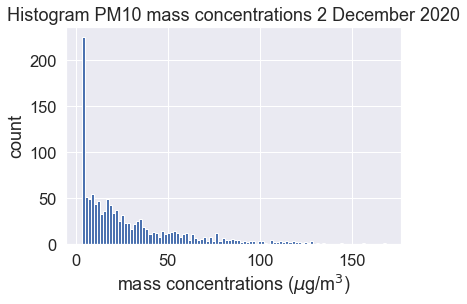

In [198]:
fig, ax = plt.subplots()                     # defining the name of our plot (fig)
# defining what time interval we want to plot (based on day and time), marker type, marker size, color and line style
ax.hist(df_lecture.loc['2020-12-02 00:00':'2020-12-03 00:00', 'pm 10 (ug/m3)'], bins=100, color='b', linestyle='-')     #df.loc can be used to select specific dates in your dataframe
ax.set_ylabel('count')
ax.set_xlabel('mass concentrations ($\mu$g/m$^3$)')
ax.set_title('Histogram PM10 mass concentrations 2 December 2020');

Now we see an anomalous high number of measurements in the first bin of our histogram. Let us have a closer look at the first bin of the data:

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


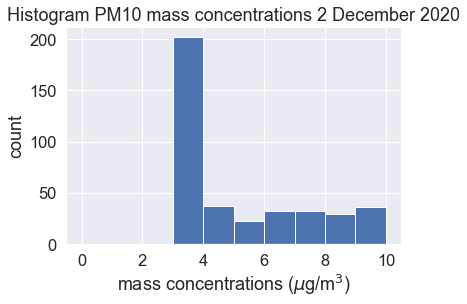

In [199]:
fig, ax = plt.subplots()                     # defining the name of our plot (fig)
# defining what time interval we want to plot (based on day and time), marker type, marker size, color and line style
ax.hist(df_lecture.loc['2020-12-02 00:00':'2020-12-03 00:00', 'pm 10 (ug/m3)'], bins=[0,1,2,3,4,5,6,7,8,9,10], color='b', linestyle='-')     #df.loc can be used to select specific dates in your dataframe
ax.set_ylabel('count')
ax.set_xlabel('mass concentrations ($\mu$g/m$^3$)')
ax.set_title('Histogram PM10 mass concentrations 2 December 2020')
# printing the smallest 20 values in our array:
sorted_data=np.sort(df_lecture.loc['2020-12-02 00:00':'2020-12-03 00:00', 'pm 10 (ug/m3)']);
print(sorted_data[0:20])

From this first analysis we see that there is a large number of points where the mass concentration is 3 $\mu$g/m$^3$. This is not realistic and seems to be the lower limit of the Flow 2 instrument or the default value when the Flow 2 did not make an observation. Therefore we should not use these values as we are not sure what they represent (actual values are unknown). Therefore we remove them from our dataset (make them NaN values (not a number) so that they can't be included as a values when we for example calculate mean values):

In [221]:
df_lecture[df_lecture['pm 10 (ug/m3)']==3]=np.nan

So now that we removed some spurious data, let's try to plot the running mean values instead of all the minute data. This will give a smoother dataset that we can interpret better. In this example we calculate the rolling mean for each point using the 20 minutes before each point where we have data:

In [277]:
df_lecture.loc['2020-12-02 00:00':'2020-12-03 00:00', 'pm 10 (ug/m3)'].rolling('20T').mean()   # calculation of the running mean (T stands for minutes)

date (UTC)
2020-12-02 00:00:39     9.347903
2020-12-02 00:01:39     9.347903
2020-12-02 00:03:39     6.918640
2020-12-02 00:04:39     9.474784
2020-12-02 00:05:39    15.610605
                         ...    
2020-12-02 23:50:39    30.899540
2020-12-02 23:51:39    27.897892
2020-12-02 23:52:39    30.495813
2020-12-02 23:57:38    30.320236
2020-12-02 23:58:39    30.320236
Name: pm 10 (ug/m3), Length: 1250, dtype: float64

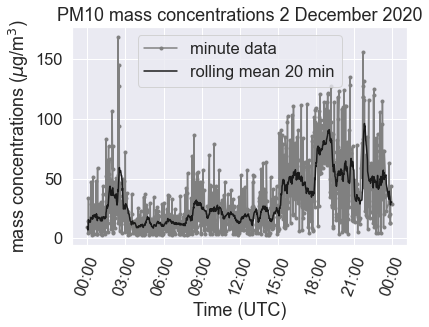

In [282]:
fig, ax = plt.subplots()                     # defining the name of our plot (fig)
# defining what time interval we want to plot (based on day and time), marker type, marker size, color and line style
ax.plot(df_lecture.loc['2020-12-02 00:00':'2020-12-03 00:00', 'pm 10 (ug/m3)'], marker='o', markersize=3, color='grey', linestyle='-', label='minute data')     #df.loc can be used to select specific dates in your dataframe
ax.plot(df_lecture.loc['2020-12-02 00:00':'2020-12-03 00:00', 'pm 10 (ug/m3)'].rolling('20T').mean(),color='k', label='rolling mean 20 min')
# set labels and title of plot
ax.set_ylabel('mass concentrations ($\mu$g/m$^3$)')
ax.set_xlabel('Time (UTC)')
ax.set_title('PM10 mass concentrations 2 December 2020')
ax.legend()
ax.tick_params(axis='x', rotation=70)
# Format x-tick labels as hour and minutes of the day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));
plt.savefig('Flow2_2Dec_PM10.png', bbox_inches='tight', dpi=300)            # saving the figure as png 

### Doing some basic statistics on the datasets

In this section we start to calculate some statistics for the datasets. Let us start by calculating the mean PM10 mass concentration during the entire dataset:

In [222]:
mean = df_lecture['pm 10 (ug/m3)'].mean()

In [223]:
print("Flow2 mean concentration PM10 :", mean)

Flow2 mean concentration PM10 : 31.46522553895612


Maybe we only want to calculate the mean between noon and 11 PM on 2 December:

In [256]:
df_lecture.loc['12-02-2020 12:00':'12-02-2020 23:00', 'pm 10 (ug/m3)'].mean()   # average for our dataset between 12:00 and 00:00

44.96742118969845

We can also calculate the hourly means during 2 December:

In [261]:
for i in range(24):       # for-loop to calculate the mean for each hour individually
    print('for hour', i+1 , 'the average PM10 mass concentration is', df_lecture.loc['12-02-2020 00:00':'12-03-2020 00:00', 'pm 10 (ug/m3)'][df_lecture.loc['12-02-2020 00:00':'12-03-2020 00:00', 'pm 10 (ug/m3)'].index.hour == i].mean(skipna=True))

for hour 1 the average PM10 mass concentration is 17.02279863834384
for hour 2 the average PM10 mass concentration is 30.36382047479814
for hour 3 the average PM10 mass concentration is 36.99781984329221
for hour 4 the average PM10 mass concentration is 12.832475786407798
for hour 5 the average PM10 mass concentration is 12.704799223919256
for hour 6 the average PM10 mass concentration is 11.301663359006202
for hour 7 the average PM10 mass concentration is 13.674994415707094
for hour 8 the average PM10 mass concentration is 14.38860122930443
for hour 9 the average PM10 mass concentration is 25.835709840601183
for hour 10 the average PM10 mass concentration is 24.53894335627557
for hour 11 the average PM10 mass concentration is 20.06143005474188
for hour 12 the average PM10 mass concentration is 16.51465598174507
for hour 13 the average PM10 mass concentration is 16.65028200344164
for hour 14 the average PM10 mass concentration is 23.199213246504428
for hour 15 the average PM10 mass con

Or maybe we want to know the average lat/lon locations for each hour of our df field (first example):

In [233]:
for i in range(24):       # for-loop to calculate the mean for each hour individually
    print('for hour', i+1 , 'the average lat/lon is', df2['latitude'][df2.index.hour == i].mean(skipna=True),'/', df2['longitude'][df2.index.hour == i].mean(skipna=True))

for hour 1 the average lat/lon is 52.242808000000004 / 0.018875
for hour 2 the average lat/lon is 52.242808000000004 / 0.018875
for hour 3 the average lat/lon is 52.242808 / 0.018875
for hour 4 the average lat/lon is 52.242808 / 0.018875
for hour 5 the average lat/lon is 52.242808000000004 / 0.018875
for hour 6 the average lat/lon is 52.242808000000004 / 0.018875
for hour 7 the average lat/lon is 52.24278604444446 / 0.018817577777777778
for hour 8 the average lat/lon is 52.26056138461538 / 0.032449469496021226
for hour 9 the average lat/lon is 52.248032020588234 / 0.030427870588235293
for hour 10 the average lat/lon is 52.242697199999995 / 0.0188042
for hour 11 the average lat/lon is 52.242772443298975 / 0.018808134020618556
for hour 12 the average lat/lon is 52.24277414492754 / 0.018786217391304347
for hour 13 the average lat/lon is 52.242784196078425 / 0.01878020261437908
for hour 14 the average lat/lon is 52.24279385185186 / 0.01878817283950617
for hour 15 the average lat/lon is 52.

Another thing we can calculate are some generic statistics:

In [64]:
df["NO2 (ppb)"].describe()

count    1273.000000
mean       30.148468
std        11.852240
min         2.000000
25%        21.000000
50%        30.000000
75%        40.000000
max        59.000000
Name: NO2 (ppb), dtype: float64

Maybe we don't understand what these variables show us (e.g. what does 25% mean?). To get some help to understand this, we can use the help function:

In [65]:
help(df.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data typ

You can use this for many other functions and is very useful if for example you want to know how to do a specific calculation (e.g. median of your dataframe):

In [66]:
help(df.median)

Help on method median in module pandas.core.frame:

median(axis=None, skipna=None, level=None, numeric_only=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return the median of the values for the requested axis.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
        Axis for the function to be applied on.
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    **kwargs
        Additional keyword arguments to be passed to the function.
    
    Returns
    -------
    Series or DataFrame (if level specified)

